In [1]:
%matplotlib inline

# Predicting Abalone Snail Sex Using Physical Characteristics

### Data was found at https://archive.ics.uci.edu/ml/datasets/Abalone , University of California, Irvine's Machine Learning repository.

In [3]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import numpy as np
import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt

In [4]:
os.chdir("/Users/lisacombs/Documents/yellowbrick/")

In [5]:
## Load the data

data = pd.read_csv("./life.csv")
data.head()

,sex,length,diameter,height,w_weight,s_weight,v_weight,sh_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# Use only M/F, no infants and make variable numeric.
data = data.loc[data['sex'].isin(['M','F'])]
data['sex'] = np.where(data['sex']=='M', 0, 1)

In [7]:
# Feature Analysis Imports 
# NOTE that all these are available for import from the `yellowbrick.features` module 
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
list(data) # numeric variables to be used as features

['sex',
 ' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

In [9]:
# Specify the features of interest

features = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.sex.as_matrix()

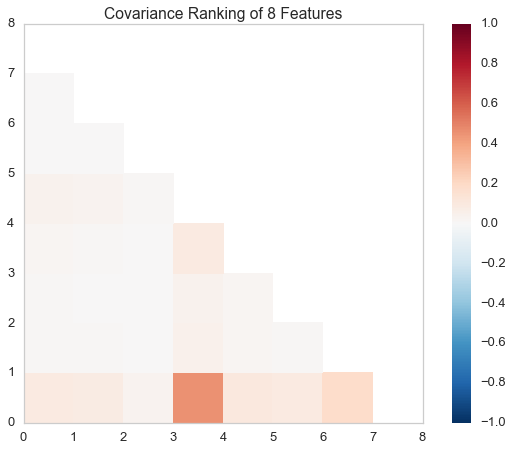

In [10]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()    # Draw/show/show the data

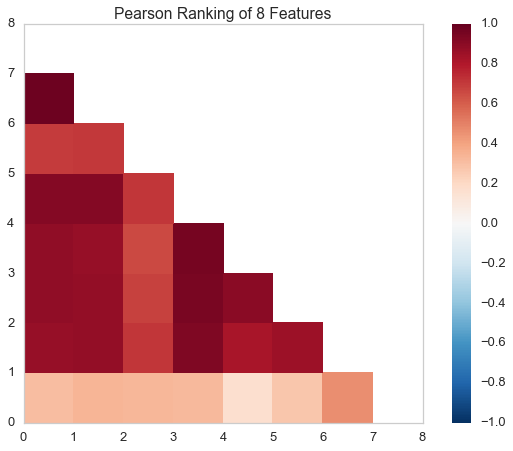

In [11]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.show()    # Draw/show/show the data

In [12]:
# Specify the features of interest and the classes of the target 
features = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

classes = ['M', 'F']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.sex.as_matrix()

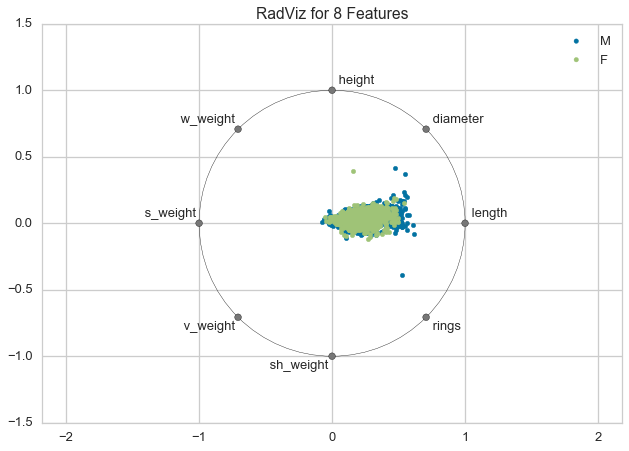

In [13]:
# Instantiate the visualizer
visualizer = visualizer = RadViz(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data

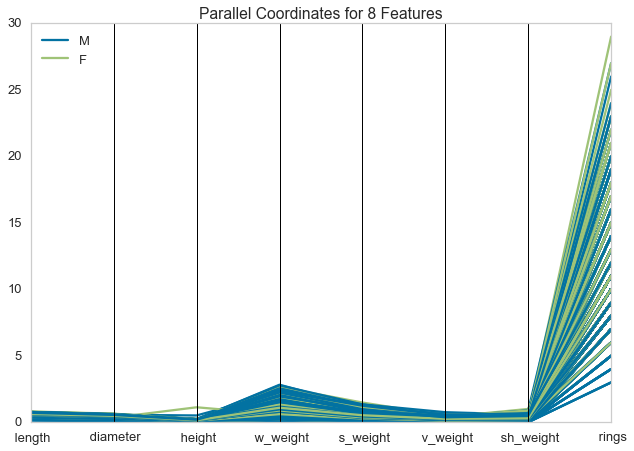

In [14]:
# Instantiate the visualizer
visualizer = visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show()         # Draw/show/show the data

In [15]:
# Regression Evaluation Imports 

from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [16]:
# Load the data - without classifier

feature_names = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight', 
 ' rings']

target_name = ' sh_weight'

# Get the X and y data from the DataFrame 
X = data[feature_names].as_matrix()
y = data[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

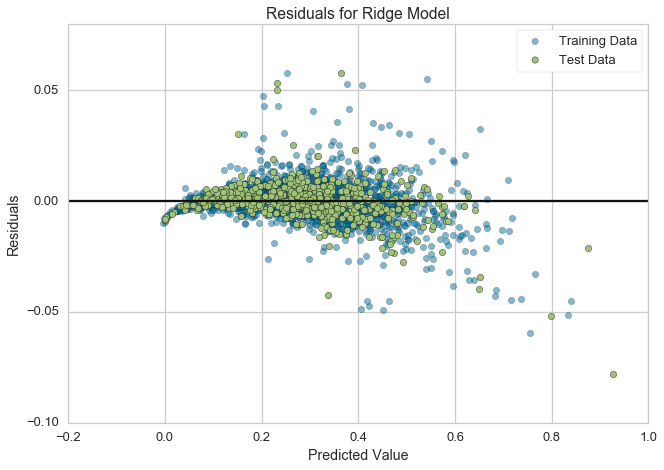

In [17]:
# Instantiate the linear model and visualizer 
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

In [18]:
feature_names = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight']
    
target_name = ' rings'

# Get the X and y data from the DataFrame 
X = data[feature_names].as_matrix()
y = data[target_name].as_matrix() 

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


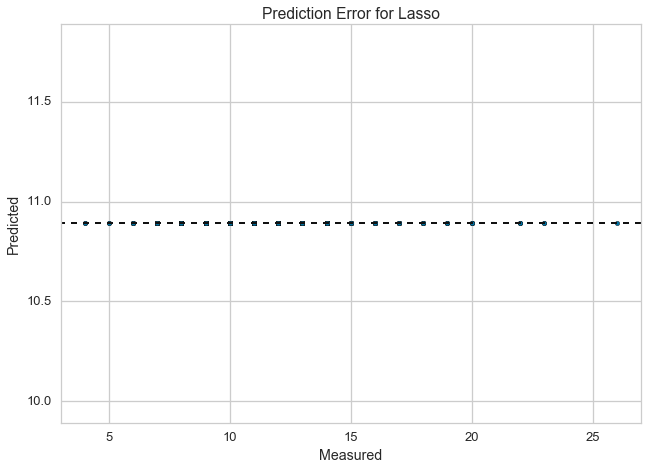

In [19]:
# Instantiate the linear model and visualizer 
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

In [20]:
# Classifier Evaluation Imports 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC, ClassBalance

In [21]:
# Specify the features of interest and the classes of the target 
features = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

classes = ['M', 'F']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.sex.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

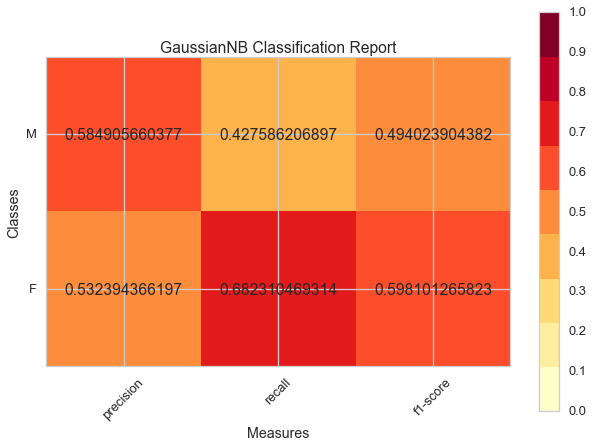

In [22]:
# Instantiate the classification model and visualizer 
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

In [23]:
# Specify the features of interest and the classes of the target 
features = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

classes = ['M', 'F']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.sex.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

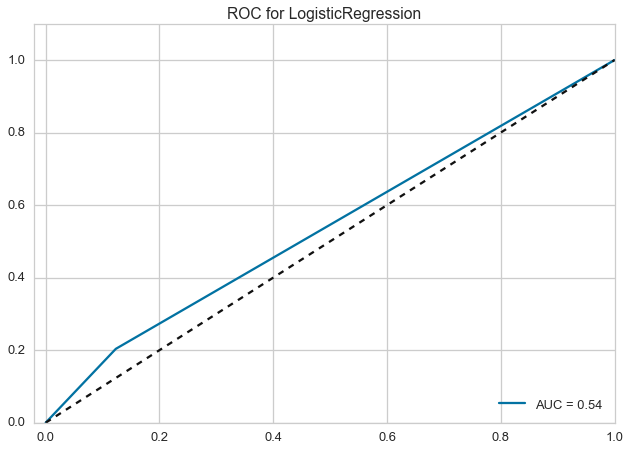

In [24]:
logistic = LogisticRegression()
visualizer = ROCAUC(logistic)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data

In [25]:
# Specify the features of interest and the classes of the target 
features = [' length',
 ' diameter',
 ' height',
 ' w_weight',
 ' s_weight',
 ' v_weight',
 ' sh_weight',
 ' rings']

classes = ['M', 'F']

# Extract the numpy arrays from the data frame 
X = data[features].as_matrix()
y = data.sex.as_matrix()

# Create the train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

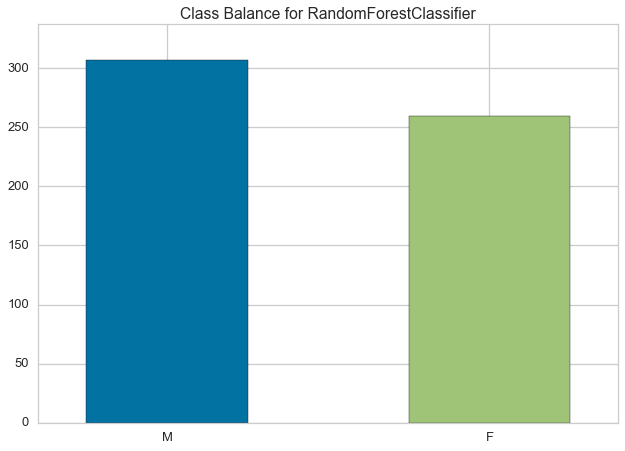

In [26]:
# Instantiate the classification model and visualizer 
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.show()             # Draw/show/show the data